### Build a Convolution Neural Network for MNIST Hand written Digit Classification

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers, models
import matplotlib.pyplot as plt

In [5]:
# Load and preprocess data
(trainX, trainY), (testX, testY) = mnist.load_data()
trainX = trainX.reshape(60000, 28, 28, 1).astype("float32") / 255
testX = testX.reshape(10000, 28, 28, 1).astype("float32") / 255
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)

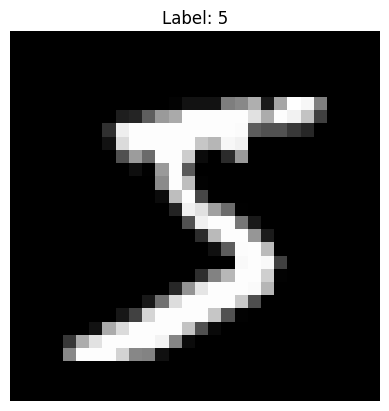

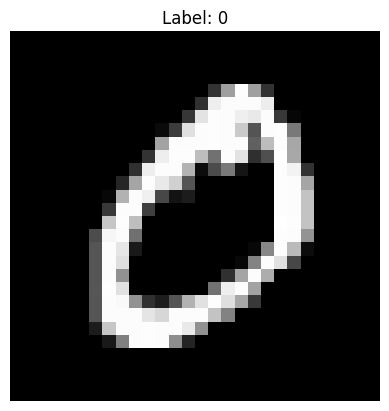

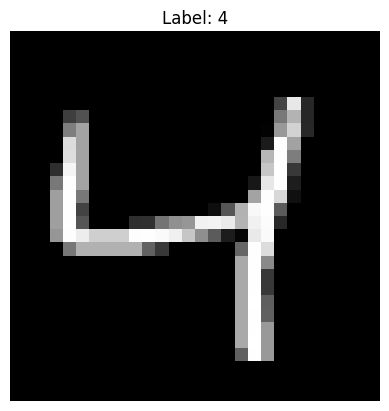

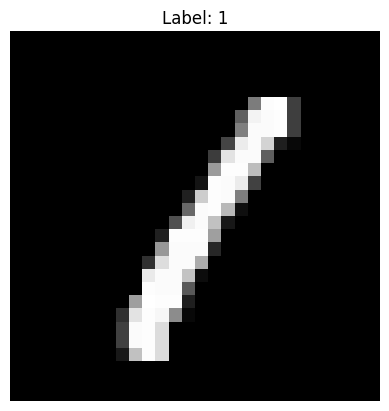

In [7]:
# Display 4 sample images with labels
for i in range(4):
    img = trainX[i].reshape(28, 28)
    label = trainY[i].argmax()
    plt.imshow(img, cmap='gray')
    plt.title("Label: " + str(label))
    plt.axis('off')
    plt.show()

In [9]:
# Build CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

C:\Users\akanksh_02\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
model.fit(trainX, trainY, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.8704 - loss: 0.4029
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9856 - loss: 0.0482
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9903 - loss: 0.0323
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9922 - loss: 0.0236
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9949 - loss: 0.0170


In [15]:
# Evaluate on test data
loss, acc = model.evaluate(testX, testY)
print("Test Accuracy:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9872 - loss: 0.0434
Test Accuracy: 0.9901999831199646
